In [1]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install glob
!pip install directory_tree
!pip install tensorflow
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import os
import sklearn
import numpy as np
import pandas as pd
import glob
import librosa 
from directory_tree import display_tree
path = r'C:/Users/princ/OneDrive - University of Strathclyde/Documents/university/fourth year/diss/Data'


In [3]:
def windows(audio, window_size):
    start = 0
    while start < len(audio):
        #len(audio) is the total number of sample points for an audio file.
        yield start, int(start) + window_size #Retrieve the sample point index index of length window_size
        start += (window_size / 2) #Calculate the starting position of the next segment

In [4]:
# now only two catergories: 0 - healthy, 1 - pathology

path = 'C:/Users/princ/OneDrive - University of Strathclyde/Documents/university/fourth year/diss/Data'

extracted_features_hel = pd.DataFrame(columns=['features','label','names','classification'])
extracted_features_pat = pd.DataFrame(columns=['features','label','names','classification'])

def extract_features(parent_dir,sub_dirs,label,file_ext="*.wav",bands = 60, frames = 41):
    '''Wrangle audio data into 60x41x2 frames.
    Bands = 60 = number of MFCC
    frames = 41 = number of windows from the audio signal
    Number of channels (like R,G,B channels in images) = 2 = mel-
    spectrograms and their corresponding delta'''
    #
    
    window_size = 512 * (frames - 1) 
    log_specgrams = []
    labels = []
    names = []

    for l, sub_dir in enumerate(sub_dirs):

        search_pattern = os.path.join(parent_dir, sub_dir, "**", file_ext)

        for fn in glob.glob(search_pattern, recursive=True): 
            #if "phrase" in fn : continue # only train on vowels
            sound_clip,s = librosa.load(fn)
            
            for (start,end) in windows(sound_clip,window_size):
                    
                feature = []
                start = int(start)
                end = int(end)

                if(len(sound_clip[start:end]) == window_size):
                    names.append(fn.replace(path,''))
                    
                    signal = sound_clip[start:end] # window the original audio
                    D = np.abs(librosa.stft(signal))**2
                    melspec = librosa.feature.melspectrogram(S=D, n_mels = bands) # length 0f 60
                    
                    logspec = librosa.amplitude_to_db(melspec) # length 0f 60 & normalized                
                    feature.append(logspec)
                    
                    melspec = librosa.feature.melspectrogram(y=signal, n_mels = bands)
                    logspec = librosa.amplitude_to_db(melspec) 
                    feature.append(logspec)
                    
                    melspec = librosa.feature.mfcc(y=signal, sr=s, n_mfcc=bands) 
                    logspec = librosa.amplitude_to_db(melspec)
                    feature.append(logspec)
                                     
                    log_specgrams.append(feature)
                    labels.append(label)
                  
    for i in range (0, len(log_specgrams)):
        log_specgrams[i] = np.array(log_specgrams[i])
        log_specgrams[i] = np.transpose(log_specgrams[i], (1, 2, 0))
                  
    data = { 'features' : log_specgrams,
            'label': labels,
            'names' : names            
           }
    df = pd.DataFrame(data , columns=['features','label','names'])
    return df

In [5]:
path = 'C:/Users/princ/OneDrive - University of Strathclyde/Documents/university/fourth year/diss/Data'

# Healthy -> label 0
extracted_features_hel = extract_features(path, ['Healthy'], 0)
print(f"Healthy features extracted: {len(extracted_features_hel)}")

# Pathology -> label 1
extracted_features_path = extract_features(path, ['Pathology'], 1)
print(f"Pathology features extracted: {len(extracted_features_path)}")

Healthy features extracted: 1344
Pathology features extracted: 2449


In [6]:
## Data should be stored in directory fromat 
display_tree(path,max_depth=4)

Data/
├── Healthy/
│   ├── 1-a_h.wav
│   ├── 1-a_l.wav
│   ├── 1-a_lhl.wav
│   ├── 1-a_n.wav
│   ├── 1-i_h.wav
│   ├── 1-i_l.wav
│   ├── 1-i_lhl.wav
│   ├── 1-i_n.wav
│   ├── 1-phrase.wav
│   ├── 1-u_h.wav
│   ├── 1-u_l.wav
│   ├── 1-u_lhl.wav
│   ├── 1-u_n.wav
│   ├── 10-a_h.wav
│   ├── 10-a_l.wav
│   ├── 10-a_lhl.wav
│   ├── 10-a_n.wav
│   ├── 10-i_h.wav
│   ├── 10-i_l.wav
│   ├── 10-i_lhl.wav
│   ├── 10-i_n.wav
│   ├── 10-phrase.wav
│   ├── 10-u_h.wav
│   ├── 10-u_l.wav
│   ├── 10-u_lhl.wav
│   ├── 10-u_n.wav
│   ├── 100-a_h.wav
│   ├── 100-a_l.wav
│   ├── 100-a_lhl.wav
│   ├── 100-a_n.wav
│   ├── 100-i_h.wav
│   ├── 100-i_l.wav
│   ├── 100-i_lhl.wav
│   ├── 100-i_n.wav
│   ├── 100-phrase.wav
│   ├── 100-u_h.wav
│   ├── 100-u_l.wav
│   ├── 100-u_lhl.wav
│   ├── 100-u_n.wav
│   ├── 1000-a_h.wav
│   ├── 1000-a_l.wav
│   ├── 1000-a_lhl.wav
│   ├── 1000-a_n.wav
│   ├── 1000-i_h.wav
│   ├── 1000-i_l.wav
│   ├── 1000-i_lhl.wav
│   ├── 1000-i_n.wav
│   ├── 1000-phrase.wav
│   ├── 1000-u_h.

C:\Users\princ\AppData\Local\Temp\ipykernel_32964\2193101141.py:2: DeprecationWarning: The `display_tree` Function is Deprecated and will be Removed in a Future Release. Please use `DirectoryTree` Instead. End of Life Date is "31st December 2024".
  display_tree(path,max_depth=4)


In [7]:
## load all data 

healthy_folders = ['Healthy']
pathology_folders = ['Pathology']

extracted_features_hel = extract_features(path, healthy_folders, 0)
extracted_features_path = extract_features(path, pathology_folders, 1)

extracted_features_hel['classification'] = 'healthy'
extracted_features_path['classification'] = 'pathology'

print(f"Healthy features extracted: {len(extracted_features_hel)}")
print(f"Pathology features extracted: {len(extracted_features_path)}")

Healthy features extracted: 1344
Pathology features extracted: 2449


In [8]:
if len(extracted_features_hel) > len(extracted_features_path):
    size = len(extracted_features_path)
else:
    size = len(extracted_features_hel)

In [9]:
extracted_features_path

,features,label,names,classification
0,"[[[-60.826935, -60.826935, 55.217552], [-61.09...",1,\Pathology\Control\48 (former RRP)\48a1.wav,pathology
1,"[[[-60.657154, -60.657154, 53.5868], [-58.3036...",1,\Pathology\Control\48 (former RRP)\48a1.wav,pathology
2,"[[[-54.80996, -54.80996, 53.579716], [-51.6531...",1,\Pathology\Control\48 (former RRP)\48a1.wav,pathology
3,"[[[-67.32924, -67.32924, 54.16824], [-63.23394...",1,\Pathology\Control\48 (former RRP)\48a1.wav,pathology
4,"[[[-59.326385, -59.326385, 53.30843], [-62.199...",1,\Pathology\Control\48 (former RRP)\48a1.wav,pathology
...,...,...,...,...
2444,"[[[-56.401577, -56.401577, 55.59391], [-57.648...",1,\Pathology\Vocal Cord Pulsy (VCP)\4\sentences\...,pathology
2445,"[[[-56.891552, -56.891552, 55.971603], [-54.17...",1,\Pathology\Vocal Cord Pulsy (VCP)\4\sentences\...,pathology
2446,"[[[-65.50765, -65.50765, 54.94554], [-60.16031...",1,\Pathology\Vocal Cord Pulsy (VCP)\4\sentences\...,pathology
2447,"[[[-57.104668, -57.104668, 52.565514], [-60.28...",1,\Pathology\Vocal Cord Pulsy (VCP)\4\sentences\...,pathology


In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

train_hel, test_hel = train_test_split(extracted_features_hel, test_size=0.2, random_state=42)
train_path, test_path = train_test_split(extracted_features_path, test_size=0.2, random_state=42)

val_hel, test_hel = train_test_split(test_hel, test_size=0.5, random_state=42)
val_path, test_path = train_test_split(test_path, test_size=0.5, random_state=42)

train = pd.concat([train_hel, train_path], ignore_index=True)
test = pd.concat([test_hel, test_path], ignore_index=True)
val = pd.concat([val_hel, val_path], ignore_index=True)

print("train:", len(train))
print("val:", len(val))
print("test:", len(test))

X_train = np.array(train['features'].tolist())
X_val   = np.array(val['features'].tolist())
X_test  = np.array(test['features'].tolist())

y_train = to_categorical(train['label'])
y_val   = to_categorical(val['label'])
y_test  = to_categorical(test['label'])

names_val = val['names']


train: 3034
val: 379
test: 380


In [11]:
print("X shape: ", X_train.shape)

X shape:  (3034, 60, 41, 3)


In [12]:
import tensorflow as tf
import keras

METRICS = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [13]:
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,BatchNormalization
from tensorflow.keras.layers import Activation,MaxPooling2D,LeakyReLU


num_classes = 2

model = keras.Sequential()

# Layer 1 - Convolution with 24 filters + Maxpooling
model.add(Conv2D(64, (3,3), padding='valid', 
                input_shape=(60,41,3), strides=(1, 1)
                 ,kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2))) 

model.add(BatchNormalization(axis=1)) 
model.add(Dropout(0.5))
model.add(Activation('tanh'))

# Layer 2 - Convolution with 48 filters + Maxpooling 
model.add(Conv2D(64, (3,3)
                       ,kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2))) 
model.add(BatchNormalization(axis=1)) 
model.add(Dropout(0.5))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.03))


# Layer 3 - Convolution with 24 filters + Maxpooling
model.add(Conv2D(64, (3,3), padding='valid',
                 ))
model.add(BatchNormalization(axis=1)) 
model.add(Dropout(0.5))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.03))



model.add(layers.Flatten())

model.add(Dense(units=64))
model.add(LeakyReLU(alpha=0.03))

model.add(Dense(units=num_classes, activation='softmax'))

# Model compilation
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy',
                metrics=['categorical_accuracy'])

C:\Users\princ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\princ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 58, 39, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 29, 19, 64)     │           116 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 29, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 29, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 17, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 8, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 8, 64)      │            52 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 8, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 13, 8, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 6, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 11, 6, 64)      │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 11, 6, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 11, 6, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4224)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       270,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 346,390 (1.32 MB)

 Trainable params: 346,284 (1.32 MB)

 Non-trainable params: 106 (424.00 B)

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from datetime import datetime 

num_epochs = 1000
num_batch_size = 64

checkpointer = ModelCheckpoint(filepath='CNN.keras', 
                               verbose=1,monitor='val_categorical_accuracy', save_best_only=True)
early = EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=100,
    mode='max',
    restore_best_weights=True)
start = datetime.now()

hist = model.fit(X_train,y_train , batch_size=num_batch_size, epochs=num_epochs, 
                 validation_data=(X_val, y_val), callbacks=[checkpointer,early], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/1000
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.7639 - loss: 0.6868
Epoch 1: val_categorical_accuracy improved from None to 0.64908, saving model to CNN.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - categorical_accuracy: 0.8860 - loss: 0.3653 - val_categorical_accuracy: 0.6491 - val_loss: 7.6531
Epoch 2/1000
 2/48 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - categorical_accuracy: 0.9570 - loss: 0.2035

C:\Users\princ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: categorical_accuracy,loss,val_categorical_accuracy,val_loss
  current = self.get_monitor_value(logs)


47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.9796 - loss: 0.1604
Epoch 2: val_categorical_accuracy improved from 0.64908 to 0.67546, saving model to CNN.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - categorical_accuracy: 0.9799 - loss: 0.1569 - val_categorical_accuracy: 0.6755 - val_loss: 2.4602
Epoch 3/1000
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.9730 - loss: 0.1559
Epoch 3: val_categorical_accuracy improved from 0.67546 to 0.96306, saving model to CNN.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - categorical_accuracy: 0.9779 - loss: 0.1441 - val_categorical_accuracy: 0.9631 - val_loss: 0.1723
Epoch 4/1000
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.9835 - loss: 0.1160
Epoch 4: val_categorical_accuracy improved from 0.96306 to 0.98417, saving model to CNN.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - categorical_accuracy: 0.9842 - loss: 0.1161 - val_categorical_accuracy: 0.9842 - val_loss: 0.0989
Epoch 5/1000
4

KeyboardInterrupt: 

In [ ]:
train_acc = model.evaluate(X_train,y_train)
val_acc = model.evaluate(X_val,y_val)
test_acc = model.evaluate(X_test,y_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - categorical_accuracy: 1.0000 - loss: 0.0085
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 1.0000 - loss: 0.0093
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - categorical_accuracy: 0.9921 - loss: 0.0688


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


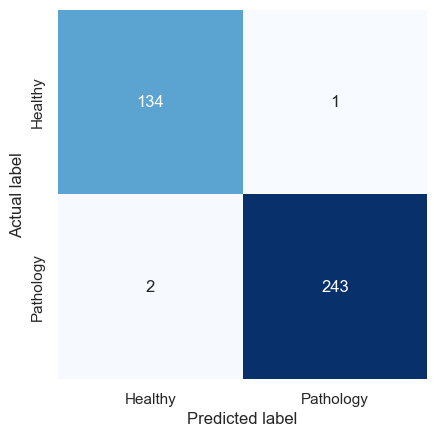

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

y_predicted = model.predict(X_test)

mat = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis=1))

class_labels = ["Healthy", "Pathology"]

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
             xticklabels=class_labels,
             yticklabels=class_labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

plt.savefig('heatmap.png')


In [ ]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)

np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)

1.0


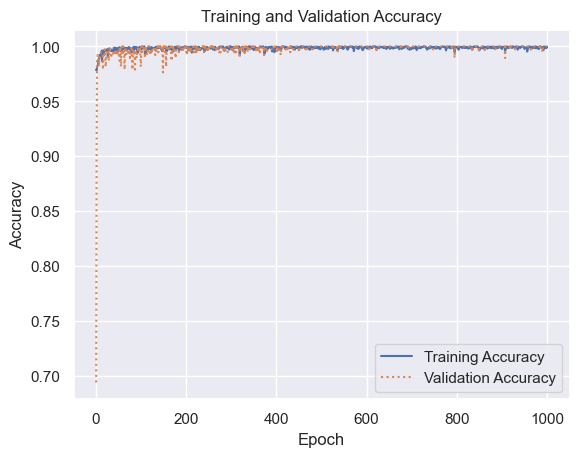

In [ ]:
import matplotlib.pyplot as plt

acc = hist.history['categorical_accuracy']
val_acc = hist.history['val_categorical_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

plt.savefig('graph.png')

best_score = max(hist.history['val_categorical_accuracy'])

print(best_score)

In [17]:
model.save('CNN.h5')
print("Model saved as CNN.h5")

Model saved as CNN.h5


In [19]:
model.save_weights('model.weights.h5')

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2%}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - categorical_accuracy: 1.0000 - loss: 0.0110
Test accuracy: 100.00%


In [22]:
import os
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from tensorflow import keras

# Your known RRP file path
test_file_path = r'C:/Users/princ/OneDrive - University of Strathclyde\Documents/university/fourth year/diss/Data/Pathology/Recurrent Respiratory Papillomatosis (RRP)/19/19a2.wav'

print(f"Testing on: {test_file_path}")
print(f"File exists: {os.path.exists(test_file_path)}")

def test_single_file(audio_file_path):
    """Extract features from a single file using your exact training method"""
    sound_clip, s = librosa.load(audio_file_path)
    window_size = 512 * (41 - 1)  # Same as your training
    bands = 60
    
    features = []
    
    start = 0
    while start < len(sound_clip):
        end = int(start) + window_size
        if end > len(sound_clip):
            break
            
        signal = sound_clip[int(start):end]
        
        if len(signal) == window_size:
            feature = []
            
            # Same feature extraction as your training
            # Mel spectrogram 1
            D = np.abs(librosa.stft(signal))**2
            melspec = librosa.feature.melspectrogram(S=D, n_mels=bands)
            logspec = librosa.amplitude_to_db(melspec)
            feature.append(logspec)
            
            # Mel spectrogram 2  
            melspec = librosa.feature.melspectrogram(y=signal, n_mels=bands)
            logspec = librosa.amplitude_to_db(melspec)
            feature.append(logspec)
            
            # MFCC
            melspec = librosa.feature.mfcc(y=signal, sr=s, n_mfcc=bands)
            logspec = librosa.amplitude_to_db(melspec)
            feature.append(logspec)
            
            features.append(feature)
        
        start += (window_size / 2)
    
    if features:
        features_array = np.array(features)
        features_array = np.transpose(features_array, (0, 2, 3, 1))
        return features_array
    else:
        return None

# Test the file
if os.path.exists(test_file_path):
    test_features = test_single_file(test_file_path)
    
    if test_features is not None:
        print(f"✅ Successfully extracted features")
        print(f"Features shape: {test_features.shape}")
        print(f"Number of windows: {test_features.shape[0]}")
        
        # Make prediction using your trained model
        predictions = model.predict(test_features)
        print(f"Raw predictions shape: {predictions.shape}")
        
        # Show first 5 predictions to see consistency
        print(f"First 5 predictions:")
        for i, pred in enumerate(predictions[:5]):
            print(f"  Window {i}: Healthy={pred[0]:.3f}, Pathology={pred[1]:.3f}")
        
        # Average predictions across all windows
        avg_prediction = np.mean(predictions, axis=0)
        healthy_confidence = avg_prediction[0]
        pathology_confidence = avg_prediction[1]
        
        print(f"\n=== FINAL PREDICTION ===")
        print(f"Average healthy probability: {healthy_confidence:.3f} ({healthy_confidence:.1%})")
        print(f"Average pathology probability: {pathology_confidence:.3f} ({pathology_confidence:.1%})")
        print(f"Confidence score: {int(pathology_confidence * 100)}%")
        print(f"Has RRP: {'✅ YES' if pathology_confidence >= 0.5 else '❌ NO'}")
        
        # Check how consistent the predictions are
        consistent_rrp = np.sum(predictions[:, 1] >= 0.5)  # Count windows predicting RRP
        total_windows = predictions.shape[0]
        print(f"Windows predicting RRP: {consistent_rrp}/{total_windows} ({consistent_rrp/total_windows:.1%})")
        
    else:
        print("❌ Could not extract features from the file")
        
else:
    print(f"❌ File not found: {test_file_path}")
    # List files in the directory to see what's available
    dir_path = os.path.dirname(test_file_path)
    if os.path.exists(dir_path):
        print(f"Files in directory: {os.listdir(dir_path)}")

Testing on: C:/Users/princ/OneDrive - University of Strathclyde\Documents/university/fourth year/diss/Data/Pathology/Recurrent Respiratory Papillomatosis (RRP)/19/19a2.wav
File exists: True
✅ Successfully extracted features
Features shape: (11, 60, 41, 3)
Number of windows: 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Raw predictions shape: (11, 2)
First 5 predictions:
  Window 0: Healthy=0.000, Pathology=1.000
  Window 1: Healthy=0.000, Pathology=1.000
  Window 2: Healthy=0.000, Pathology=1.000
  Window 3: Healthy=0.000, Pathology=1.000
  Window 4: Healthy=0.000, Pathology=1.000

=== FINAL PREDICTION ===
Average healthy probability: 0.000 (0.0%)
Average pathology probability: 1.000 (100.0%)
Confidence score: 100%
Has RRP: ✅ YES
Windows predicting RRP: 11/11 (100.0%)
